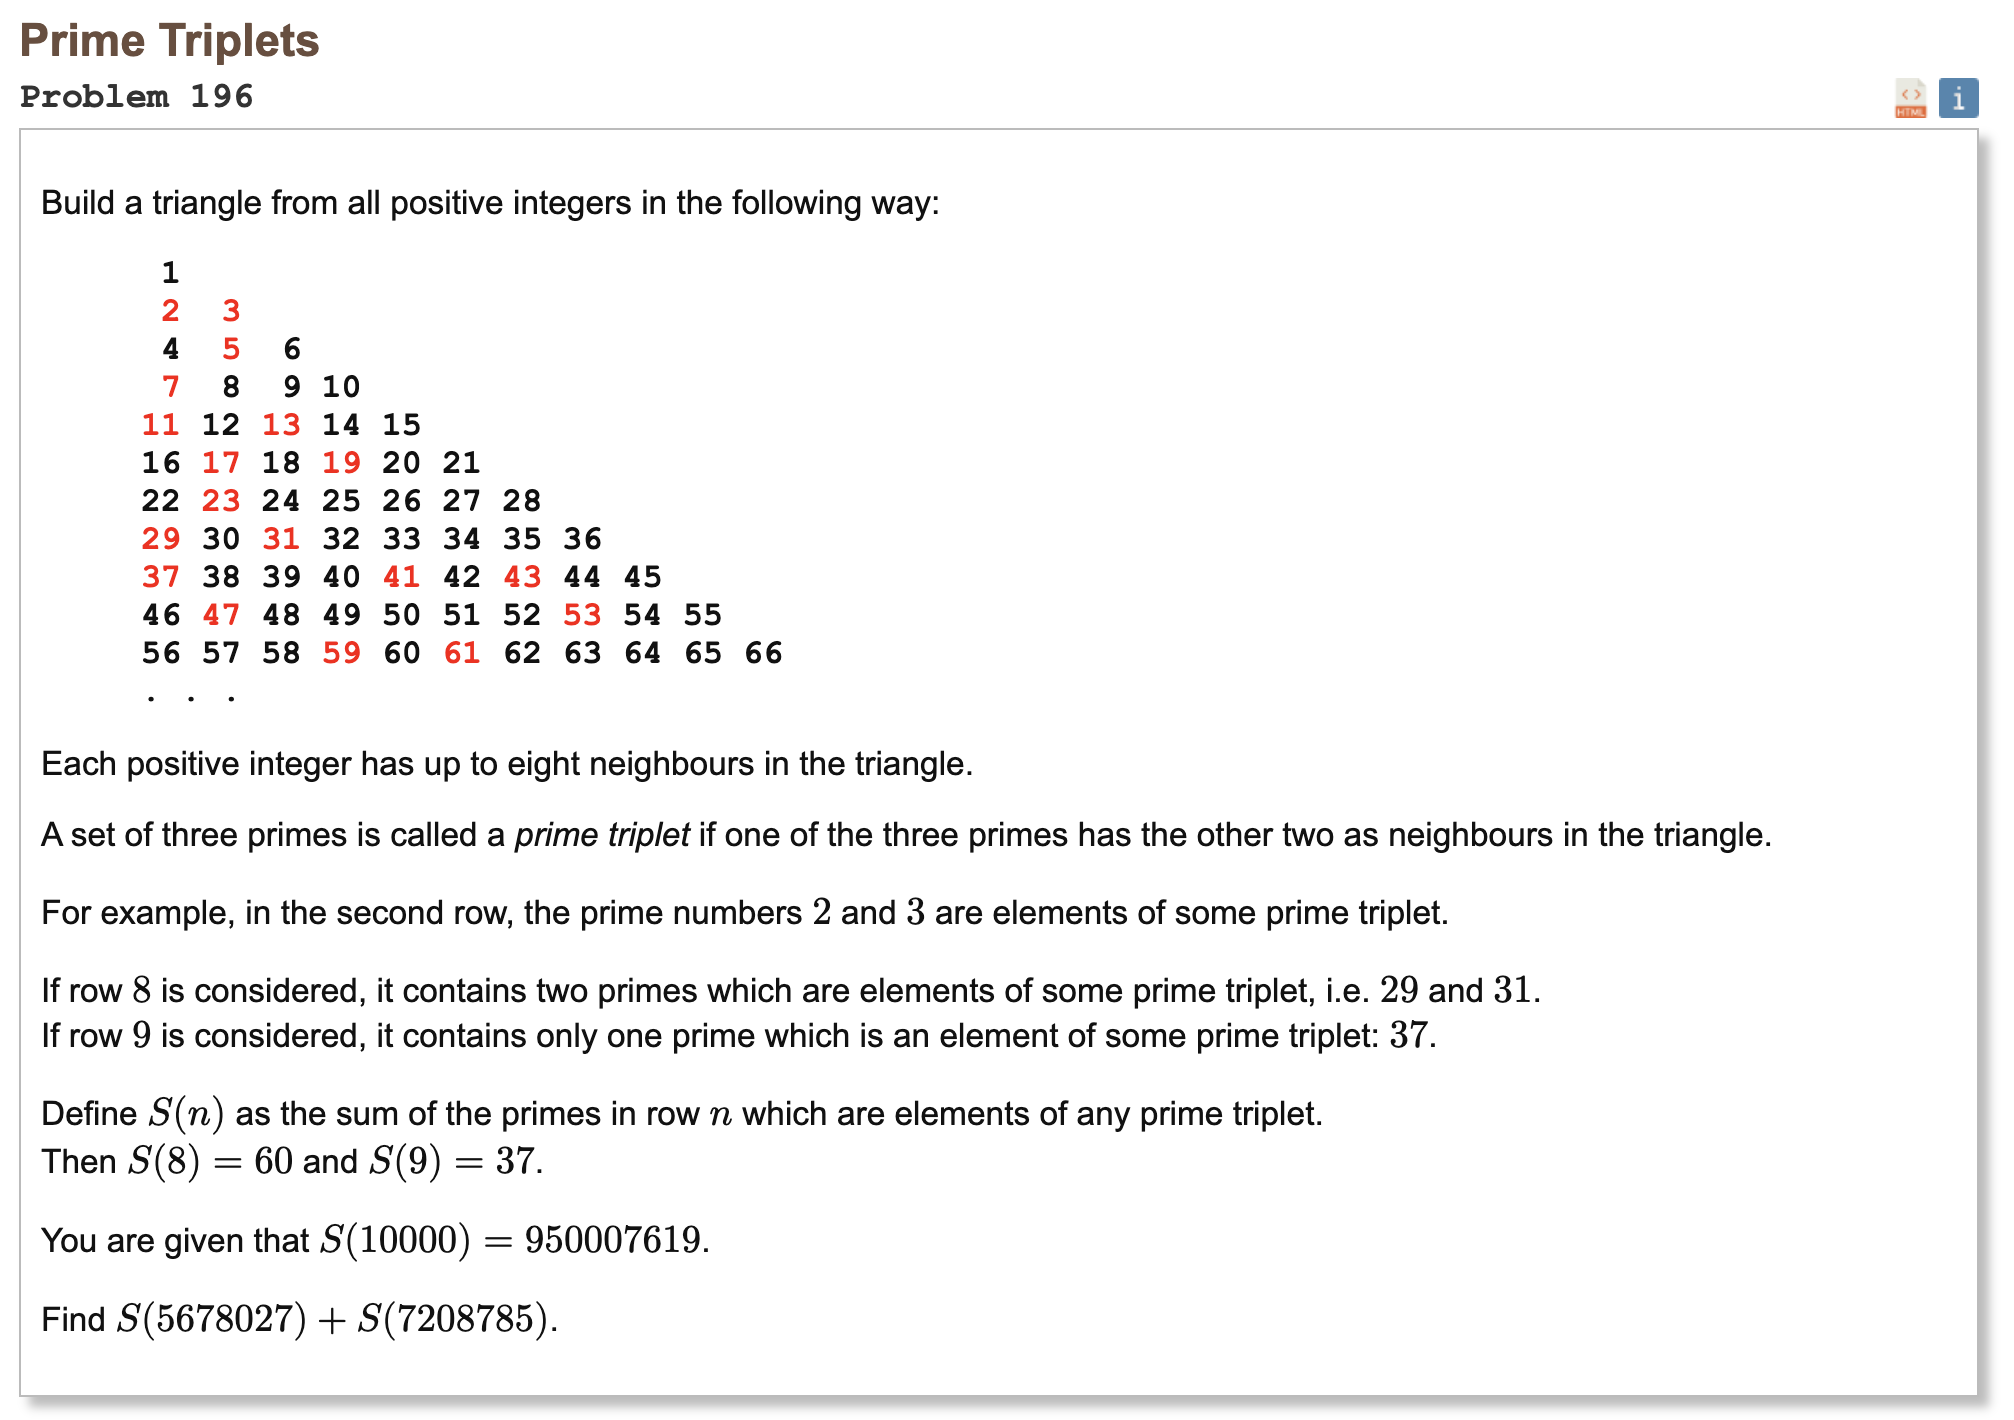

## Initial approach

* we build a big triangular grid of integers where row r has r numbers
* each number has up to 8 neighbours so we need adjacency rules for prime triplets
* a prime is counted if it has two neighbouring primes and forms a triplet
* rows to check are extremely large so we cannot build the whole triangle
* instead compute number ranges for each target row and its adjacent rows
* generate primes only in needed windows with a segmented sieve
* check neighbours by using row indexing formulas and test which primes belong to any triplet
* sum all qualifying primes for rows 5678027 and 7208785 and add both results

In [1]:
import math

def primes_up_to(n):
    sieve = [True] * (n + 1)
    sieve[0] = sieve[1] = False
    m = int(math.isqrt(n))
    for i in range(2, m + 1):
        if sieve[i]:
            step = i
            start = i * i
            sieve[start:n + 1:step] = [False] * (((n - start) // step) + 1)
    return [i for i in range(n + 1) if sieve[i]]

def segmented_primes(low, high, base_primes):
    size = high - low + 1
    sieve = [True] * size
    for p in base_primes:
        start = ((low + p - 1) // p) * p
        if start < p * p:
            start = p * p
        for t in range(start, high + 1, p):
            sieve[t - low] = False
    if low == 1:
        sieve[0] = False
    return {low + i for i in range(size) if sieve[i]}

def row_range(r):
    start = r * (r - 1) // 2 + 1
    end = start + r - 1
    return start, end

def build_rows(r):
    s0, e0 = row_range(r - 1)
    s1, e1 = row_range(r)
    s2, e2 = row_range(r + 1)
    low = s0
    high = e2
    base = primes_up_to(int(math.isqrt(high)) + 1)
    seg = segmented_primes(low, high, base)
    return seg, (s0, e0), (s1, e1), (s2, e2)

def neighbors(n, r, s0, e0, s1, e1, s2, e2):
    if n < s1 or n > e1:
        return []
    idx = n - s1
    up_row = r - 1
    down_row = r + 1
    res = []
    if idx < up_row:
        res.append((s0 + idx))
        res.append((s0 + idx - 1))
    if idx > 0 and idx < r - 1:
        pass
    if idx > 0 and idx < r:
        res.append((n - 1))
    if idx < r - 1:
        res.append((n + 1))
    res.append(s2 + idx)
    res.append(s2 + idx + 1)
    if idx > 0:
        res.append(s2 + idx - 1)
    return res

def S(r):
    seg, (s0, e0), (s1, e1), (s2, e2) = build_rows(r)
    total = 0
    for n in range(s1, e1 + 1):
        if n not in seg:
            continue
        neigh = neighbors(n, r, s0, e0, s1, e1, s2, e2)
        pcount = sum(1 for x in neigh if x in seg)
        if pcount >= 2:
            total += n
    return total

In [2]:
%%time
result = S(5678027) + S(7208785)
print("Result:", result)

Result: 124573232329018052
CPU times: user 9.65 s, sys: 141 ms, total: 9.79 s
Wall time: 9.8 s
